In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('data loading')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('sequence padding')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape, 'input train shape')
print(input_test.shape, 'input test shape')

data loading
25000 train sequence
25000 test sequence
sequence padding
(25000, 500) input train shape
(25000, 500) input test shape


In [8]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 570us/step - loss: 0.5868 - acc: 0.6773 - val_loss: 0.4753 - val_acc: 0.7870
Epoch 2/10
20000/20000 [==============================] - 11s 560us/step - loss: 0.4332 - acc: 0.8145 - val_loss: 0.3987 - val_acc: 0.8272
Epoch 3/10
20000/20000 [==============================] - 14s 707us/step - loss: 0.2855 - acc: 0.8877 - val_loss: 0.4245 - val_acc: 0.8216
Epoch 4/10
20000/20000 [==============================] - 13s 643us/step - loss: 0.2238 - acc: 0.9139 - val_loss: 0.3294 - val_acc: 0.8726
Epoch 5/10
20000/20000 [==============================] - 14s 684us/step - loss: 0.1603 - acc: 0.9424 - val_loss: 0.4561 - val_acc: 0.7942
Epoch 6/10
20000/20000 [==============================] - 12s 590us/step - loss:

In [9]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

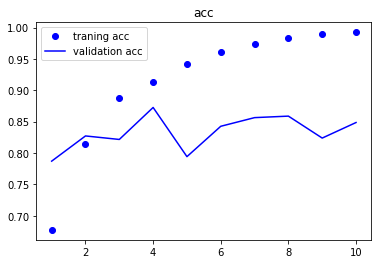

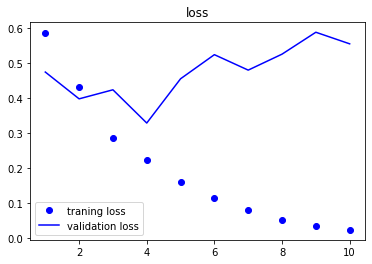

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print()
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()